# 13. Principal Componant Analysis

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

### Iris

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target
targetnames = iris.target_names

In [5]:
np.cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

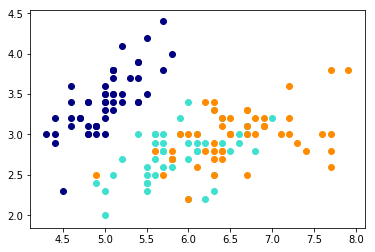

In [6]:
### 종류별로 column 1 과 column 2 를 찍어본다.

colors = ['navy', 'turquoise', 'darkorange']
for color, i, targetname in zip(colors, [0, 1, 2], targetnames):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label = targetname)

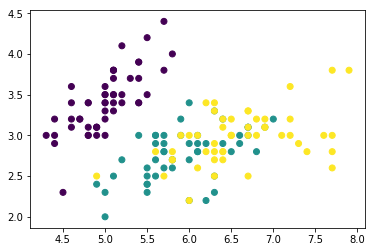

In [7]:
### 이렇게 짤 수도 있음

_ = plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
### 표준화 작업

X_scale = (X - np.mean(X, axis=0))/np.sqrt(np.diag(np.cov(X.T)))

In [9]:
pca = PCA(n_components = 2)   ### componant의 크기는 전체 dim보다 클 수 없음.
X_r = pca.fit(X_scale).transform(X_scale)   ### fit은 PCA적합, transform()은 X * eigenvector 의 값
print(pca.components_)   ### fit에 대한 각 축의 성분 출력  cov(X)의 eigenvector

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [10]:
print(pca.explained_variance_)   ### cov(X)의 eigenvalue 값
print(pca.explained_variance_ratio_)   ### 전체 성분중(dim) 각 분산의 비율

[ 2.91081808  0.92122093]
[ 0.72770452  0.23030523]


In [11]:
print(pca.mean_)

[ -1.45716772e-15  -1.72251102e-15  -2.04355051e-15  -9.84397749e-17]


In [12]:
print(pca.singular_values_)

[ 20.82575075  11.71588318]


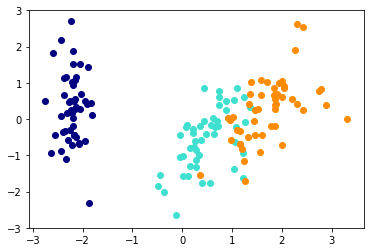

In [13]:
for color, i, targetname in zip(colors, [0, 1, 2], targetnames):
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, label=targetname)

### Breast Cancer

In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
targetnames = cancer.target_names

X.shape

(569, 30)

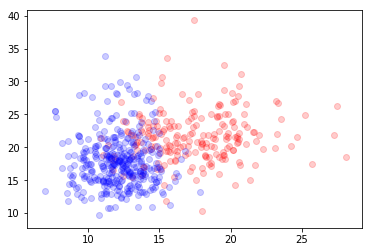

In [17]:
colors = ['red', 'blue']
for color, i, targetname in zip(colors, [0, 1], targetnames):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha = 0.2, label = targetname)

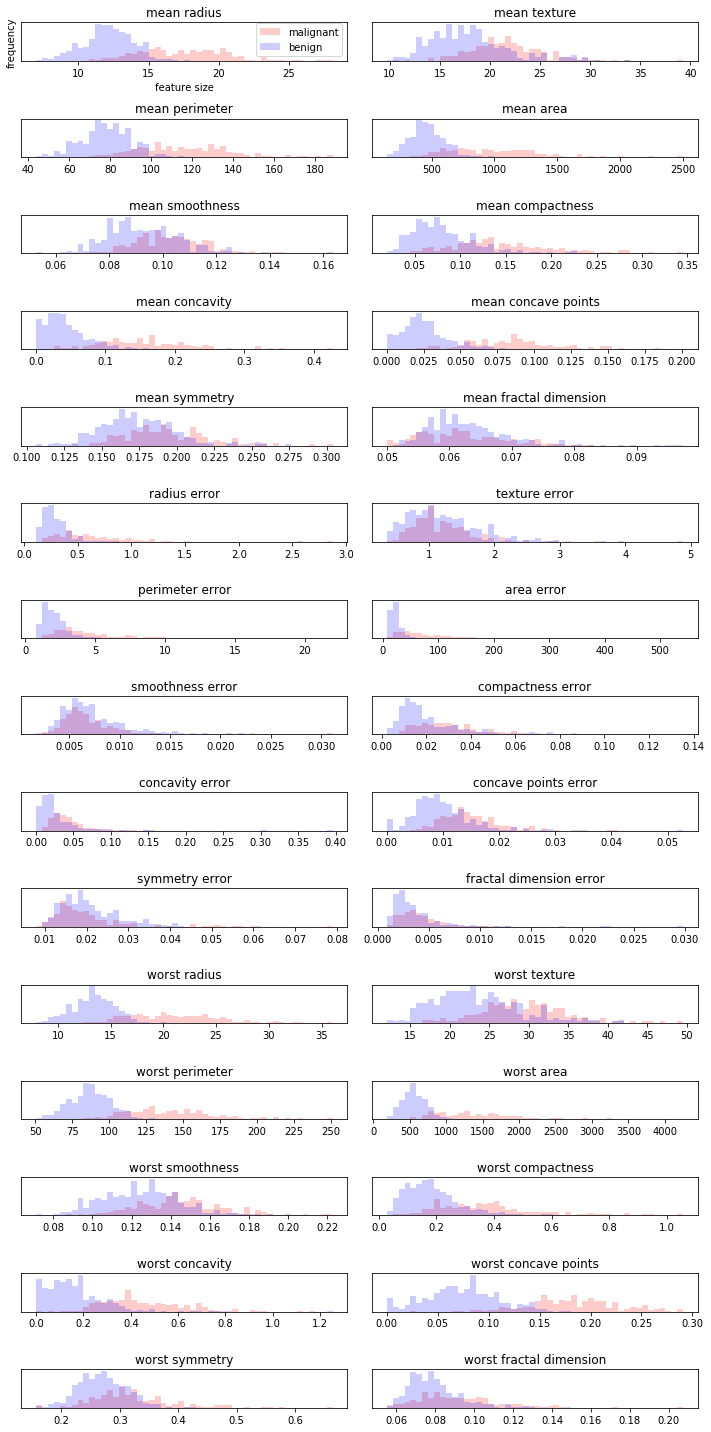

In [18]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color='red', alpha=0.2)
    ax[i].hist(benign[:,i], bins=bins, color='blue', alpha=0.2)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("feature size")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [19]:
pca = PCA(n_components=5)
X_r = pca.fit(X).transform(X)

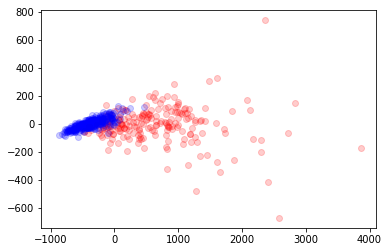

In [20]:
for color, i, targetname in zip(colors, [0, 1], targetnames):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha = 0.2, label = targetname)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_scal = scaler.fit(X).transform(X)

In [23]:
pca = PCA(n_components=2)
X_r2 = pca.fit(X_scal).transform(X_scal)

In [24]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[ 13.30499079   5.7013746 ]
[ 0.44272026  0.18971182]


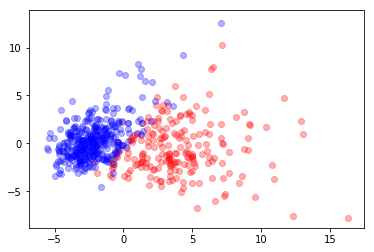

In [25]:
for color, i, targetnames in zip(colors, [0, 1], targetnames):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha = 0.3, label = targetname)

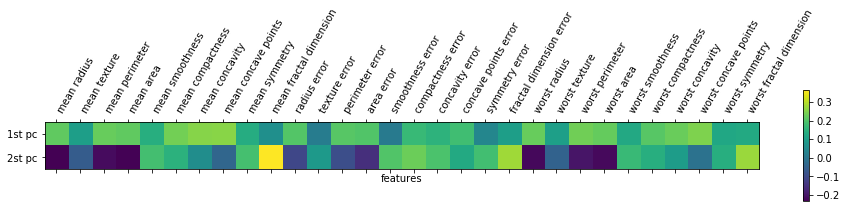

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["1st pc", "2st pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
_ = plt.xlabel('features')